In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [74]:
EXPERIMENT = 'pairwise_power'

df_1 = pd.read_csv(f'./results/{EXPERIMENT}_results_first_half.csv', sep=', ', engine='python')
df_2 = pd.read_csv(f'./results/{EXPERIMENT}_results_second_half.csv', sep=', ', engine='python')

df_2['params_index'] += df_1['params_index'].max() + 1

df = pd.concat([df_1, df_2], ignore_index=True)

In [72]:
df = df.loc[df['Precision'].notna(), :]
df = df.loc[df['Average precision'].notna(), :]

df['Fraction of shifting mechanisms'] = df['sparsity'] / df['n_variables']

# plot_df = df.melt(
#     id_vars=[
#         'params_index', 'n_variables', 'n_total_environments', 'sparsity', 'Fraction of shifting mechanisms',
#         'sample_size', 'dag_density', 'reps', 'data_simulator', 'dag_simulator',
#         'Method', 'Number of environments', 'Rep', 'MEC size', 'Soft'],
#     # value_vars=['True orientation rate', 'False orientation rate', 'Average precision'], # 'Fraction of possible DAGs'], 
#     value_vars=['Precision', 'Recall'], #'Average precision'],
#     var_name='Metric',
#     value_name='Average fraction',
# )

plot_df = df.rename(
        {
            'n_variables': 'Number of variables',
            'dag_density': 'Edge density',
            'sparsity': 'Number of shifts',
            'sample_size': '# samples',
            'n_total_environments': 'Total environments',
        }, axis=1
    ).replace(
        {'er': 'Erdos-Renyi', 'ba': 'Hub', 'PC (pool all)': 'Full PC (oracle)'}
    )

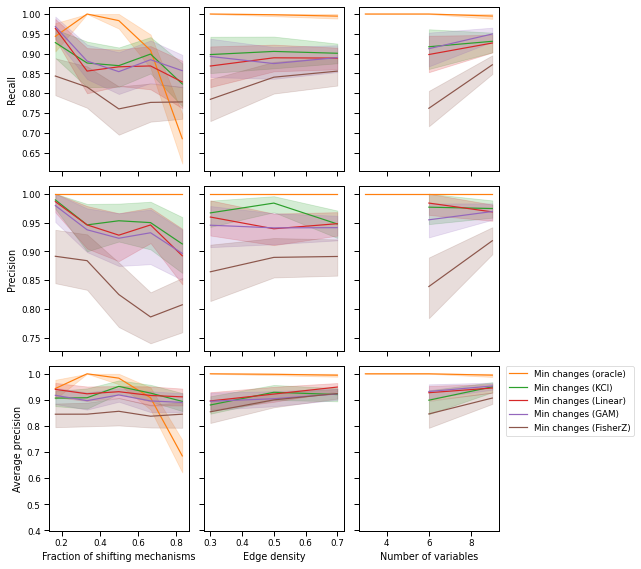

In [73]:
sns.set_context('paper')

grid_vars = [
    # 'Number of environments',
    'Fraction of shifting mechanisms', 'Edge density', 'Number of variables'
]

n_settings = [5, 3, 3]

indices = [
    (a, b) for a, b in zip(np.cumsum([0] + n_settings)[:-1], np.cumsum(n_settings))
]

for graph_model in plot_df['dag_simulator'].unique():
    fig, axes = plt.subplots(3, len(grid_vars), sharey='row', sharex='col', figsize=(3*len(grid_vars), 8))

    for row, metric in zip(axes, ['Recall', 'Precision', 'Average precision']):
    # for row, metric in zip(axes, ['Recall', 'Precision', 'Average precision']):
        for g_var, (lb, ub), ax in zip(grid_vars, indices, row):
            sns.lineplot(
                data=plot_df[
                    (plot_df['params_index'] >= lb)
                    & (plot_df['params_index'] < ub)
                    & (plot_df['dag_simulator'] == graph_model)
                    & (~plot_df['Method'].isin(['Full PC (oracle)']))
                    & (plot_df['Soft'] == False)
                    # IMPORTANT! otherwise average over all number of environments
                    & (
                        (plot_df['Number of environments'] == plot_df['Number of environments'].max())
                        if not (g_var == 'Number of environments') else True)
                ],
                # data=plot_df.groupby([g_var, 'Test']).mean().reset_index(),
                x=g_var,
                y=metric,
                hue='Method',
                ax=ax,
                palette=[
                    sns.color_palette("tab10")[i]
                    for i in [1, 2, 3, 4, 5]
                ],
                # markers=['d', 'P', 's'],
                # palette='Set1',
                legend='full',
                # alpha=1,
            )

            # ax.axvline(0.05, ls=':', c='grey')
            # ax.set_title('')
            # ax.legend(loc='upper right')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    for ax in np.concatenate(axes)[:-1]:
        ax.get_legend().remove()
        
    plt.ylim([0.4, 1.03])
        
    # plt.suptitle(f'DAG model: {graph_model}', fontsize=14, y=0.96, x=0.45)
    plt.tight_layout()
    # plt.savefig(f'./figures/empirical_select_rates_{graph_model}.pdf')
    plt.show()

## multi-panel

In [32]:
EXPERIMENT = 'pairwise_power'

df = pd.read_csv(f'./results/{EXPERIMENT}_results_50_reps.csv', sep=', ', engine='python')

df['Fraction of shifting mechanisms'] = df['sparsity'] / df['n_variables']

# plot_df = df.melt(
#     id_vars=[
#         'params_index', 'n_variables', 'n_total_environments', 'sparsity', 'Fraction of shifting mechanisms',
#         'sample_size', 'dag_density', 'reps', 'data_simulator', 'dag_simulator',
#         'Method', 'Number of environments', 'Rep', 'MEC size', 'Soft'],
#     # value_vars=['True orientation rate', 'False orientation rate', 'Average precision'], # 'Fraction of possible DAGs'], 
#     value_vars=['Precision', 'Recall'], #'Average precision'],
#     var_name='Metric',
#     value_name='Average fraction',
# )

df = df.rename(
        {
            'n_variables': 'Number of variables',
            'dag_density': 'Edge density',
            'sparsity': 'Number of shifts',
            'sample_size': '# samples',
            'n_total_environments': 'Total environments',
        }, axis=1
    ).replace(
        {'er': 'Erdos-Renyi', 'ba': 'Hub', 'PC (pool all)': 'Full PC (oracle)'}
    )

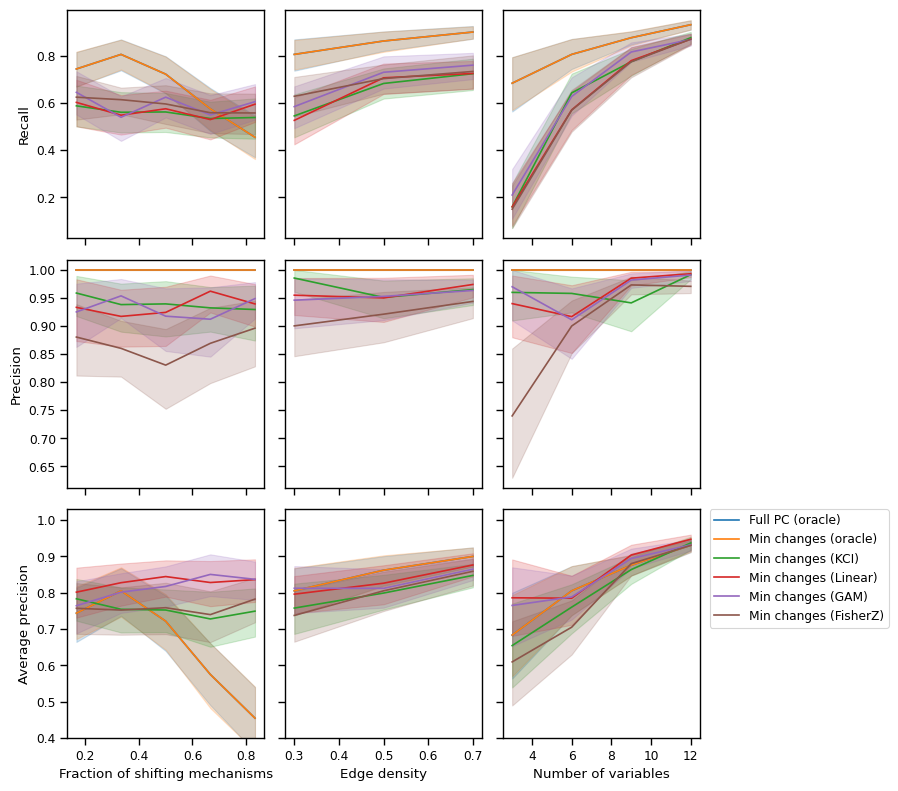

In [36]:
sns.set_context('paper')

plot_df = df

grid_vars = [
    # 'Number of environments',
    'Fraction of shifting mechanisms', 'Edge density', 'Number of variables'
]

# indices = [
#     (16, 30), (8, 16), (30, 40), (0, 8),  
# ]
indices = [
    (4, 9), (9, 12), (0, 4)
]

for graph_model in plot_df['dag_simulator'].unique():
    fig, axes = plt.subplots(3, len(grid_vars), sharey='row', sharex='col', figsize=(3*len(grid_vars), 8))

    # for row, metric in zip(axes, ['True orientation rate', 'False orientation rate', 'Average precision']):
    for row, metric in zip(axes, ['Recall', 'Precision', 'Average precision']):
        for g_var, (lb, ub), ax in zip(grid_vars, indices, row):
            sns.lineplot(
                data=plot_df[
                    (plot_df['params_index'] >= lb)
                    & (plot_df['params_index'] < ub)
                    & (plot_df['dag_simulator'] == graph_model)
                    & (plot_df['Soft'] == False)
                    # IMPORTANT! otherwise average over all number of environments
                    & (
                        (plot_df['Number of environments'] == plot_df['Number of environments'].max())
                        if not (g_var == 'Number of environments') else True)
                ],
                # data=plot_df.groupby([g_var, 'Test']).mean().reset_index(),
                x=g_var,
                y=metric,
                hue='Method',
                ax=ax,
                # markers=['d', 'P', 's'],
                # palette='Set1',
                legend='full',
                # alpha=1,
            )

            # ax.axvline(0.05, ls=':', c='grey')
            # ax.set_title('')
            # ax.legend(loc='upper right')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    for ax in np.concatenate(axes)[:-1]:
        ax.get_legend().remove()
        
    plt.ylim([0.4, 1.03])
        
    # plt.suptitle(f'DAG model: {graph_model}', fontsize=14, y=0.96, x=0.45)
    plt.tight_layout()
    # plt.savefig(f'./figures/empirical_select_rates_{graph_model}.pdf')
    plt.show()

## 2 environments, old

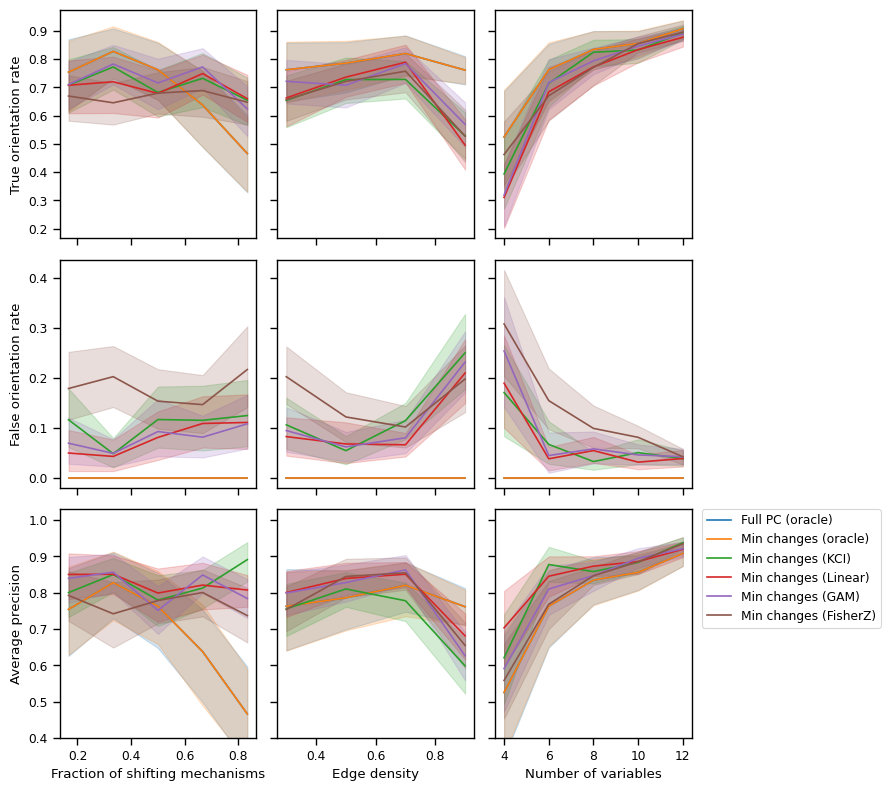

In [83]:
sns.set_context('paper')

plot_df = df

grid_vars = [
    # 'Number of environments',
    'Fraction of shifting mechanisms', 'Edge density', 'Number of variables'
]

# indices = [
#     (16, 30), (8, 16), (30, 40), (0, 8),  
# ]
indices = [
    (5, 10), (10, 14), (0, 5)
]

for graph_model in plot_df['dag_simulator'].unique():
    fig, axes = plt.subplots(3, len(grid_vars), sharey='row', sharex='col', figsize=(3*len(grid_vars), 8))

    for row, metric in zip(axes, ['True orientation rate', 'False orientation rate', 'Average precision']):
    # for row, metric in zip(axes, ['Recall', 'Precision', 'Average precision']):
        for g_var, (lb, ub), ax in zip(grid_vars, indices, row):
            sns.lineplot(
                data=plot_df[
                    (plot_df['params_index'] >= lb)
                    & (plot_df['params_index'] < ub)
                    & (plot_df['dag_simulator'] == graph_model)
                    # IMPORTANT! otherwise average over all number of environments
                    & (
                        (plot_df['Number of environments'] == plot_df['Number of environments'].max())
                        if not (g_var == 'Number of environments') else True)
                ],
                # data=plot_df.groupby([g_var, 'Test']).mean().reset_index(),
                x=g_var,
                y=metric,
                hue='Method',
                ax=ax,
                # markers=['d', 'P', 's'],
                # palette='Set1',
                legend='full',
                # alpha=1,
            )

            # ax.axvline(0.05, ls=':', c='grey')
            # ax.set_title('')
            # ax.legend(loc='upper right')

    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    for ax in np.concatenate(axes)[:-1]:
        ax.get_legend().remove()
        
    plt.ylim([0.4, 1.03])
        
    # plt.suptitle(f'DAG model: {graph_model}', fontsize=14, y=0.96, x=0.45)
    plt.tight_layout()
    # plt.savefig(f'./figures/empirical_select_rates_{graph_model}.pdf')
    plt.show()

## vary sparsity

In [15]:
EXPERIMENT = 'pairwise_power'
df = pd.read_csv(f'./results/{EXPERIMENT}_results_sparsity.csv', sep=', ', engine='python')

plot_df = df.melt(
    id_vars=[
        'params_index', 'n_variables', 'n_total_environments', 'sparsity',
        'sample_size', 'dag_density', 'reps', 'data_simulator', 'dag_simulator',
        'Method', 'Number of environments', 'Rep', 'MEC size', 'Soft'],
    # value_vars=['True orientation rate', 'False orientation rate', 'Average precision'], # 'Fraction of possible DAGs'], 
    value_vars=['Precision', 'Recall', 'Average precision'],
    var_name='Metric',
    value_name='Average fraction',
)

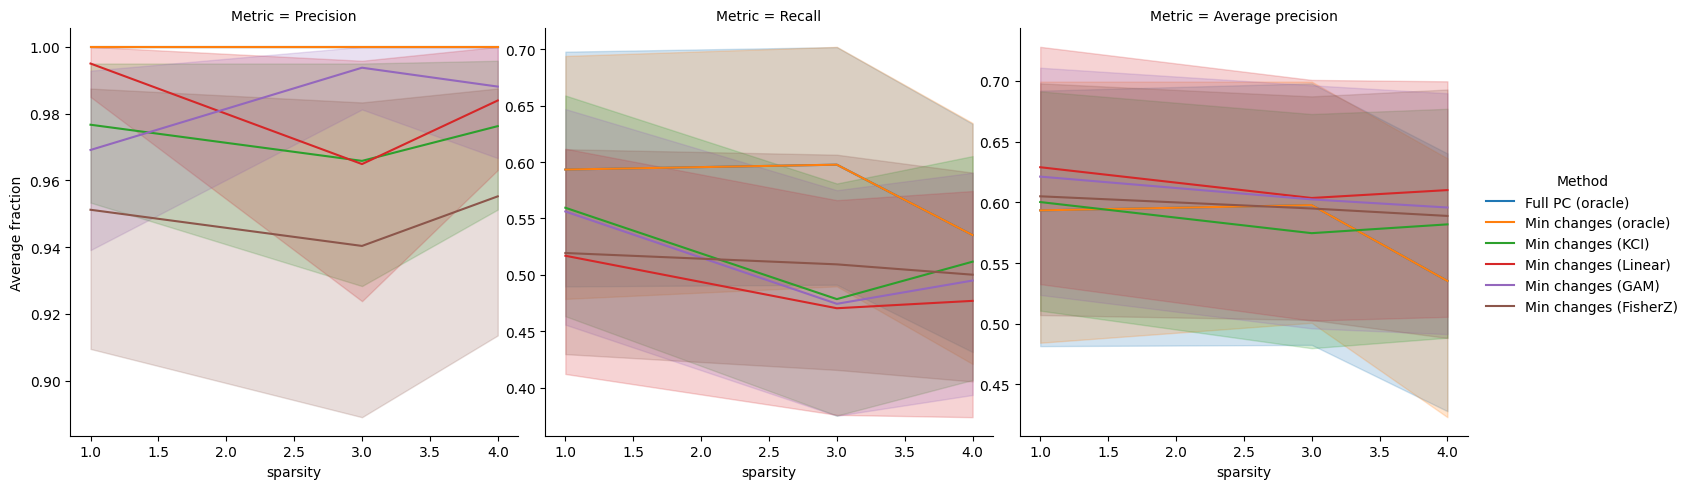

In [9]:
for ds in df['dag_simulator'].unique():
    g = sns.relplot(
        data=plot_df[
            # (plot_df['sample_size'] == plot_df['sample_size'].max())
            # & (plot_df['dag_simulator'] == ds)
            # (plot_df['Method'].isin(['Full PC (oracle)', 'Min changes (oracle)', 'Min changes (KCI)']))
            (plot_df['Soft'] == False)
            # & (plot_df['sparsity'].isin([2, 4]))
        ],
        x='sparsity',
        y='Average fraction',
        hue='Method',
        # row='sparsity',
        col='Metric',
        # ci=None,
        kind='line',
        # style='Soft',
        # height=3,
        # aspect=2, # 3,
        # legend='Full',
        facet_kws={'sharey': False, 'sharex': True},
    )
    
#     col_vals = g.data[g._col_var].unique()
#     for c, col_val in enumerate(col_vals):
#         g.axes[0, c].set_ylabel(col_val, visible=True)
    
#     row_vals = g.data[g._row_var].unique()
#     for r, row_val in enumerate(row_vals):
#         for c, col_val in enumerate(col_vals):
#             g.axes[r, c].set_title(f'{g._row_var} = {row_val}')
#             g.axes[r, c].set_ylabel(col_val, visible=True)
    
    # g.fig.suptitle(f'DAG model: {title_dict[ds]}', fontsize=14, y=1.02, x=0.45)
    plt.subplots_adjust(wspace=0.06)
    plt.show()

## vary n_vars, fixed sparsity ratio

In [41]:
EXPERIMENT = 'pairwise_power'
df = pd.read_csv(f'./results/{EXPERIMENT}_results_n_vars.csv', sep=', ', engine='python')

plot_df = df.melt(
    id_vars=[
        'n_variables', 'n_total_environments', 'sparsity',
        'sample_size', 'dag_density', 'reps', 'data_simulator', 'dag_simulator',
        'Method', 'Number of environments', 'Rep', 'MEC size', 'Soft'],
    # value_vars=['True orientation rate', 'False orientation rate', 'Average precision'], # 'Fraction of possible DAGs'], 
    value_vars=['Precision', 'Recall', 'Average precision'],
    var_name='Metric',
    value_name='Average fraction',
)

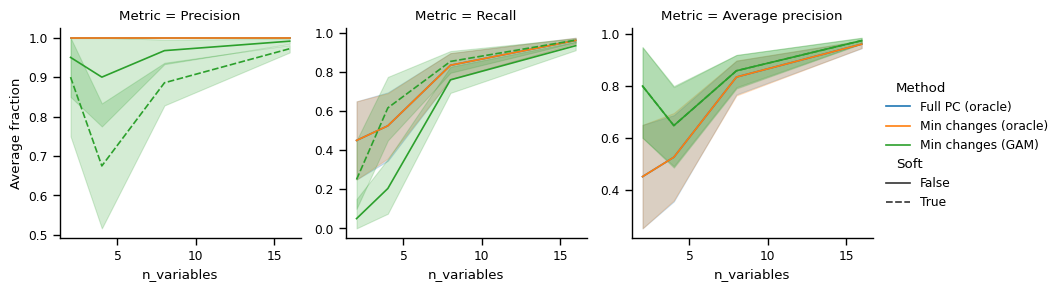

In [49]:
sns.set_context('paper')

for ds in df['dag_simulator'].unique():
    g = sns.relplot(
        data=plot_df[
            # (plot_df['sample_size'] == plot_df['sample_size'].max())
            # & (plot_df['dag_simulator'] == ds)
            (plot_df['Method'].isin(['Full PC (oracle)', 'Min changes (oracle)', 'Min changes (GAM)']))
            # (plot_df['Soft'] == False)
            & (plot_df['Number of environments'] == 2)
        ],
        x='n_variables',
        y='Average fraction',
        hue='Method',
        # row='sparsity',
        col='Metric',
        # ci=None,
        kind='line',
        style='Soft',
        height=3,
        # aspect=2, # 3,
        # legend='Full',
        facet_kws={'sharey': False, 'sharex': True},
    )
    
#     col_vals = g.data[g._col_var].unique()
#     for c, col_val in enumerate(col_vals):
#         g.axes[0, c].set_ylabel(col_val, visible=True)
    
#     row_vals = g.data[g._row_var].unique()
#     for r, row_val in enumerate(row_vals):
#         for c, col_val in enumerate(col_vals):
#             g.axes[r, c].set_title(f'{g._row_var} = {row_val}')
#             g.axes[r, c].set_ylabel(col_val, visible=True)
    
    # g.fig.suptitle(f'DAG model: {title_dict[ds]}', fontsize=14, y=1.02, x=0.45)
    # plt.subplots_adjust(wspace=0.06)
    plt.show()